# Datasets

## Overview

### Available Operations


### Datasets:
* [List](#List) - List all datasets
* [Create](#Create) - Create a new dataset
* [Retrieve](#Retrieve) - Retrieve a dataset
* [Update](#Update) - Update a dataset
* [Delete](#Delete) - Delete a dataset
* [List_datapoints](#List_datapoint) - List datapoints
* [Create_datapoint](#Create_datapoint) - Create a datapoint
* [Update_datapoint](#Update_datapoint) - Update a datapoint
* [Delete_datapoint](#Delete_datapoint) - Delete a datapoint
* [Retrieve_datapoints](#Retrieve_datapoint) - Retrieve a datapoint
* [Create_multiple_datapoints](#Create_multiple_datapoints) - create multiple datapoints
* [Delete_all_datapoints](#Delete_all_datapoints)  - delete all datapoints


### Setup

Before trying out the code set up the virtual environment and the environment variable. 

On the terminal go to the project directory, activate the virtual environment and install Orq sdk:

In [ ]:
#  pip install orq-ai-sdk - latest version

Next set up the API key:

In [ ]:
import os

os.environ["ORQ_API_KEY"] = "" # enter your api key here

In [ ]:
from orq_ai_sdk import Orq
import os

orq = Orq(server_url="https://my.staging.orq.ai", api_key=os.getenv("ORQ_API_KEY"))

## List

List information about datasets from your workspace.

In [ ]:
# Without extra parameters
res = orq.datasets.list() 
print(res.data)

print("")
print("Your Datasets:")
for dataset in res.data:
    print(dataset.display_name)

[ListDatasetsData(id='01JMYJ25TSQDX48CR2BH286FRF', display_name='Dataset_Test_Updated', project_id='fae1eec0-6789-4981-b6c7-820d9fccdc8e', workspace_id='75277fb8-5912-4b38-85c0-fab177600803', metadata=ListDatasetsMetadata(total_versions=0.0, datapoints_count=0.0), created_by_id=None, updated_by_id=None, created=datetime.datetime(2025, 2, 25, 12, 42, 13, 672000, tzinfo=TzInfo(UTC)), updated=datetime.datetime(2025, 2, 25, 12, 54, 38, 160000, tzinfo=TzInfo(UTC)))]

Your Datasets:
Dataset_Test_Updated


In [ ]:
# With extra parameters
limit = 2
stariting_after = "01JMYG1S84RFKH15CBQCSVH83B" 
ending_before = "01JMYG2FK44EZM4K0SBDG41DR4"

# Out of examplary Datasets list: [Dataset4, Dataset3, Dataset2, Dataset1]
resPage1 = orq.datasets.list(limit = limit)
print("First page:")
for dataset in resPage1.data:
    print(dataset.display_name) # prints [Dataset4, Dataset3]
    

resPage2 = orq.datasets.list(limit = limit, ending_before=ending_before) 
print("Previous page:")
for dataset in resPage2.data:
    print(dataset.display_name) # When ending_before= 3,  prints [Dataset2, Dataset1]


resPage3 = orq.datasets.list(limit = limit, starting_after=stariting_after) 
print("Next page:")
for dataset in resPage3.data:
    print(dataset.display_name) # When starting_after= 2, prints [Dataset4, Dataset3]

First page:
Previous page:
Next page:


## Create

Create a new dataset.

### Example Usage

In [ ]:
path = "Default/Datasets"
name = "Dataset_Test"

dataset = {
  "display_name": name,
  "path": path
}

res = orq.datasets.create(request=dataset)
print(res)

print("")
print(f"Created dataset at: {path} with a name {res.display_name}")

This will create an empty dataset in the specified directory:

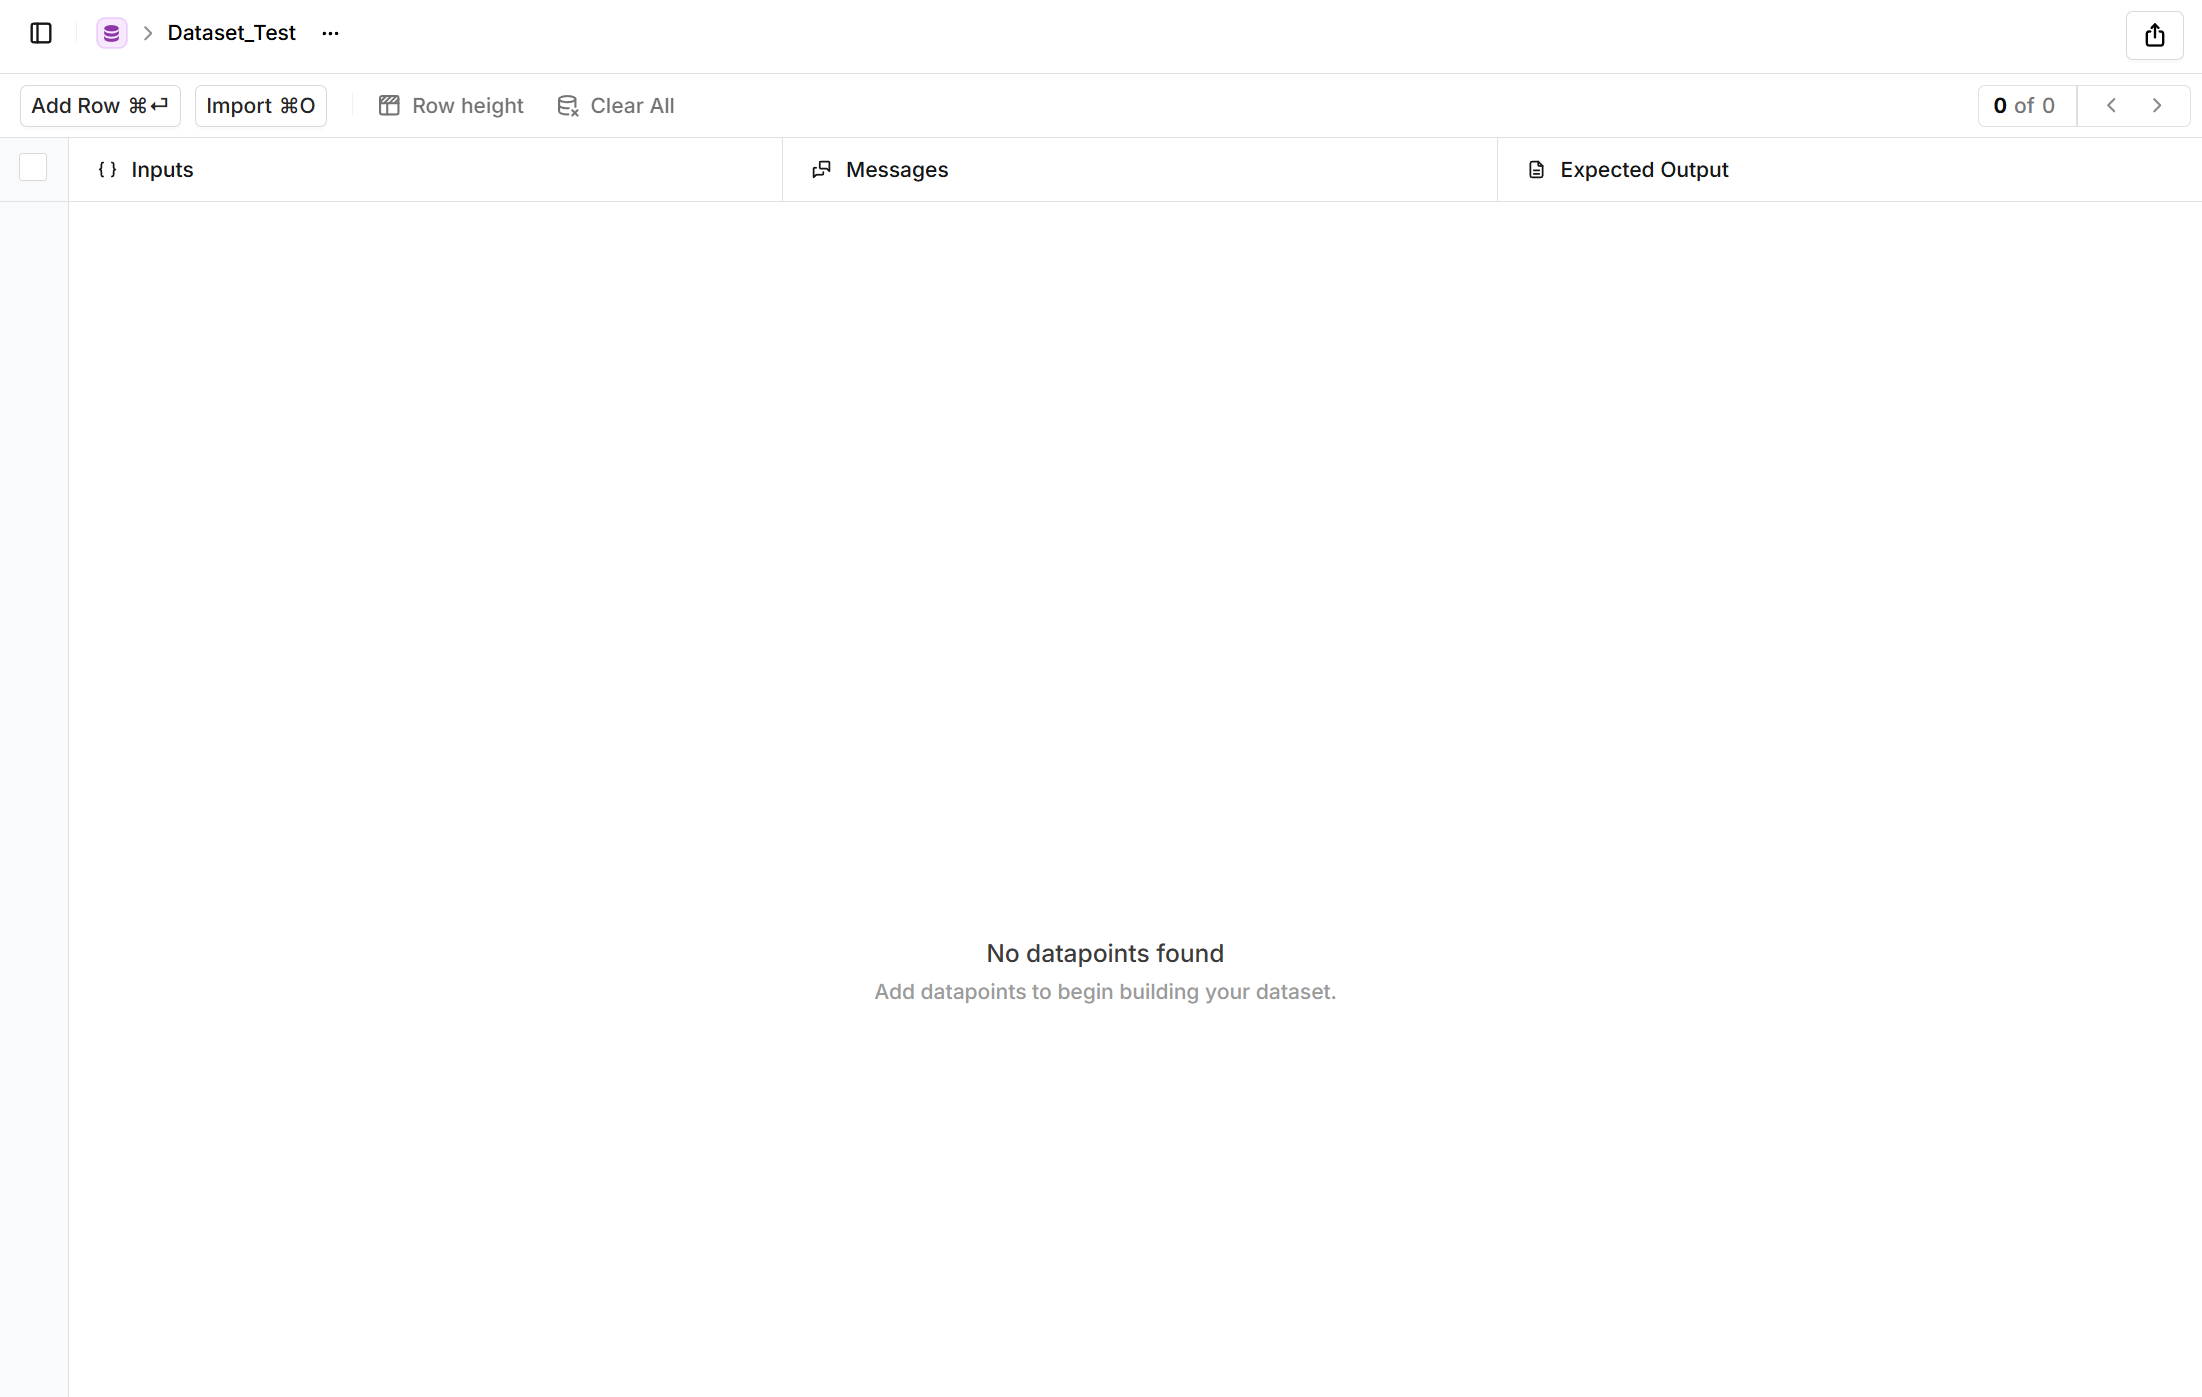

## Retrieve

Retrieve information of a specific dataset.

In [ ]:
specific_id = "01JMYJ25TSQDX48CR2BH286FRF" # change for the dataset id from your workspace

In [ ]:
res = orq.datasets.retrieve(dataset_id= specific_id)
print(res)

print("")
print(f"Retrieved dataset with id {res.id} and a name {res.display_name}")

id='01JMYJ25TSQDX48CR2BH286FRF' display_name='Dataset_Test_Updated' project_id='fae1eec0-6789-4981-b6c7-820d9fccdc8e' workspace_id='75277fb8-5912-4b38-85c0-fab177600803' metadata=RetrieveDatasetMetadata(total_versions=0.0, datapoints_count=0.0) created_by_id=None updated_by_id=None created=datetime.datetime(2025, 2, 25, 12, 42, 13, 672000, tzinfo=TzInfo(UTC)) updated=datetime.datetime(2025, 2, 25, 12, 54, 38, 160000, tzinfo=TzInfo(UTC))

Retrieved dataset with id 01JMYJ25TSQDX48CR2BH286FRF and a name Dataset_Test_Updated


## Update

Update settings of a specific dataset.

In [ ]:
new_name = "Dataset_Test_Updated"

res = orq.datasets.update(dataset_id=specific_id, display_name=new_name)
print(res)

print("")
print(f"Succesfully updated the dataset with id {res.id} on {res.updated} with a new name {res.display_name}")

The chosen dataset will be updated on the platform:

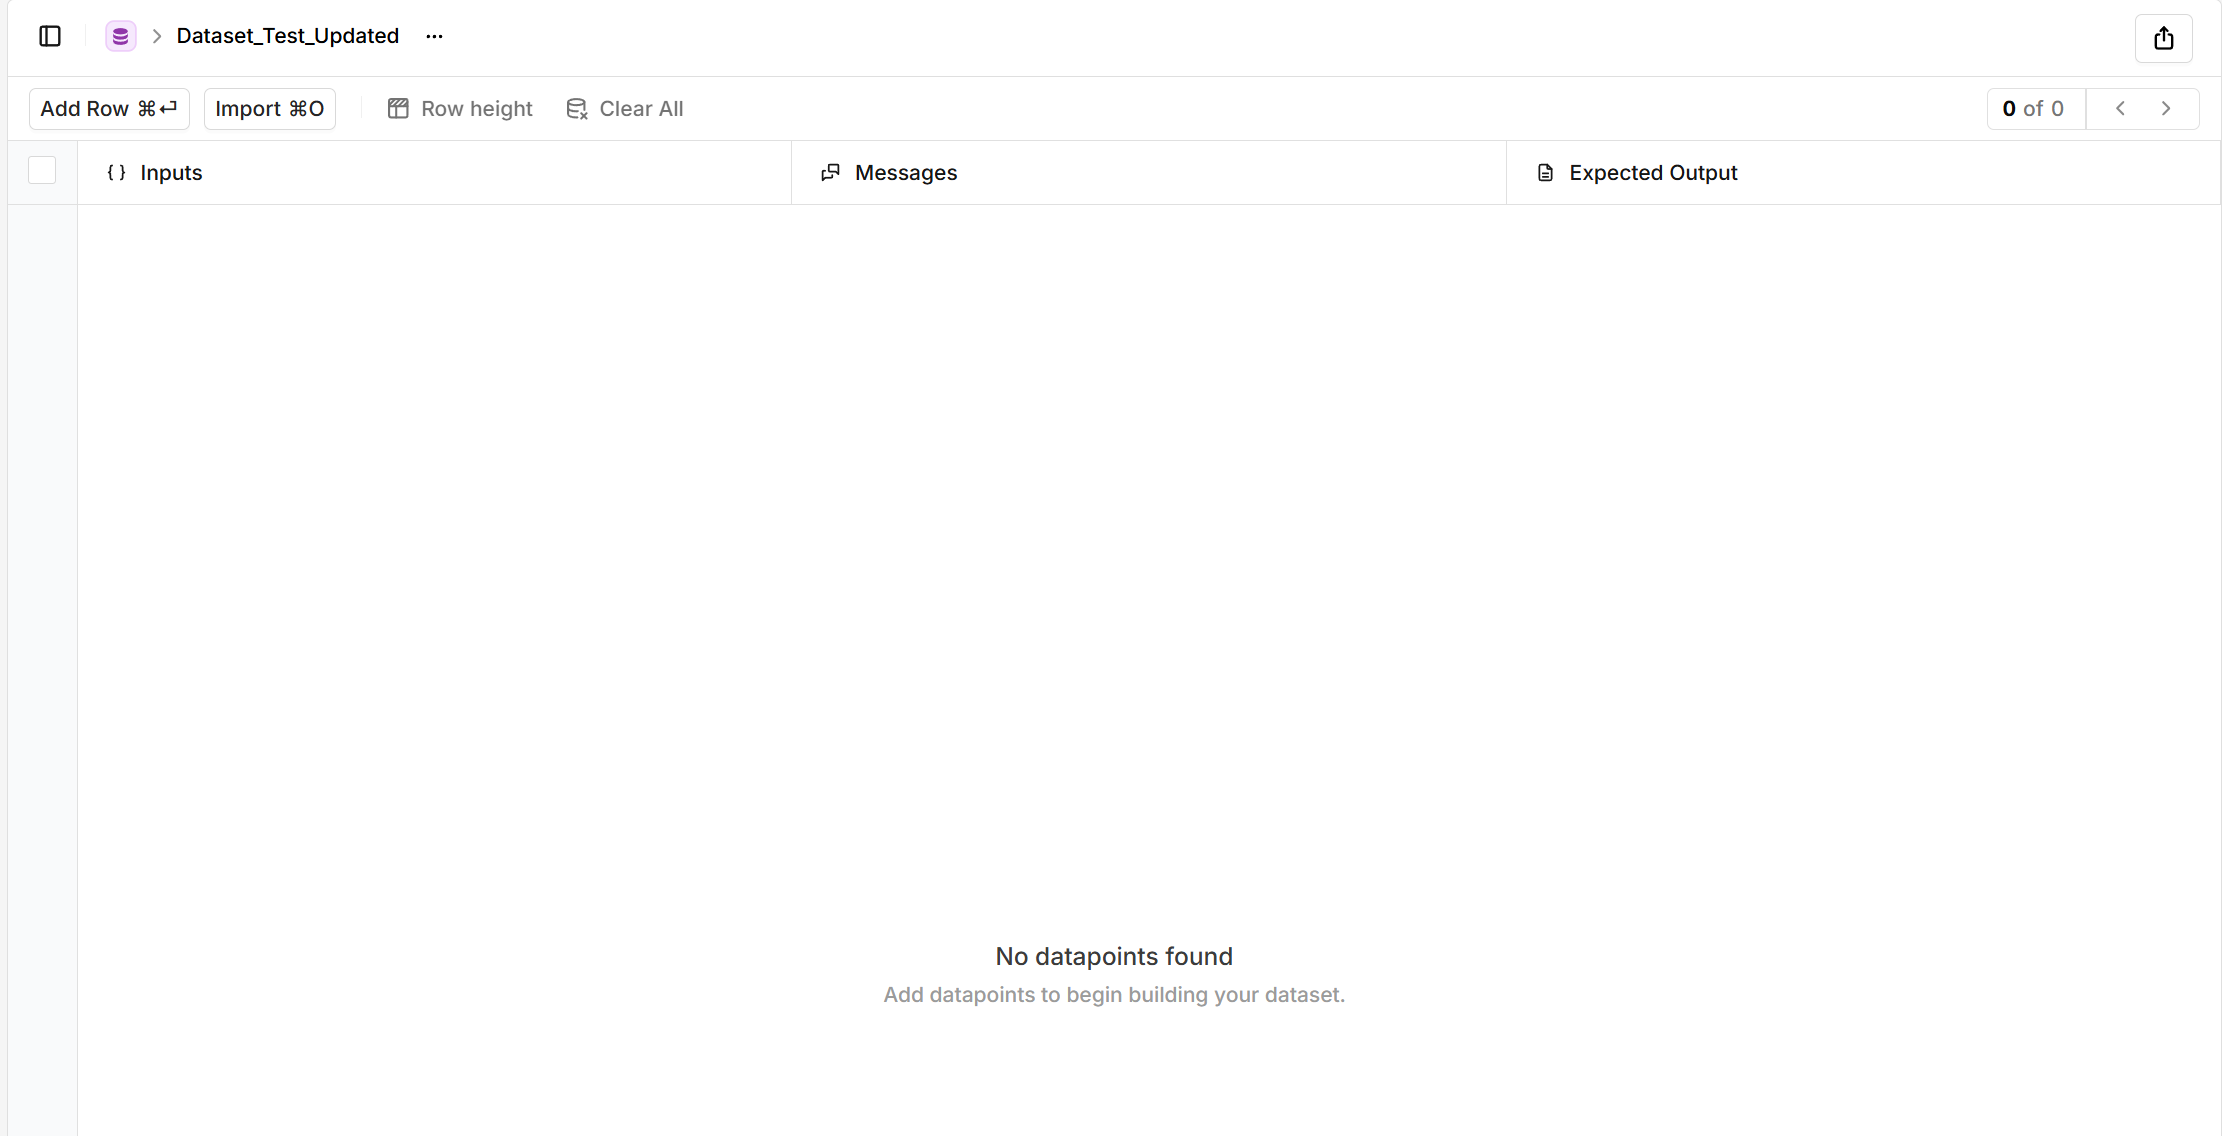

## Delete

Delete a specific dataset.

In [ ]:
print("Your datasets before deletion:")
for dataset in orq.datasets.list().data:
    print(dataset.display_name)

res = orq.datasets.delete(dataset_id=specific_id)

print("")
print("Your datasets after deletion:")
for dataset in orq.datasets.list().data:
    print(dataset.display_name) 

Your datasets before deletion:
Dataset_Test_Updated

Your datasets after deletion:


## List_datapoint

Retrieves a paginated list of datapoints from a specific dataset

In [ ]:
print(orq.datasets.list())

In [ ]:
dataset = "" # enter your dataset id 

In [ ]:
# by default the limit is 10, you can change it by passing the limit parameter
res = orq.datasets.list_datapoints(dataset_id = dataset) 

print("The datapoints in the dataset are: ")

for i in res.data:
    print(i.inputs)

for representation we can retrieve information of the first 10 datapoints of this sample dataset

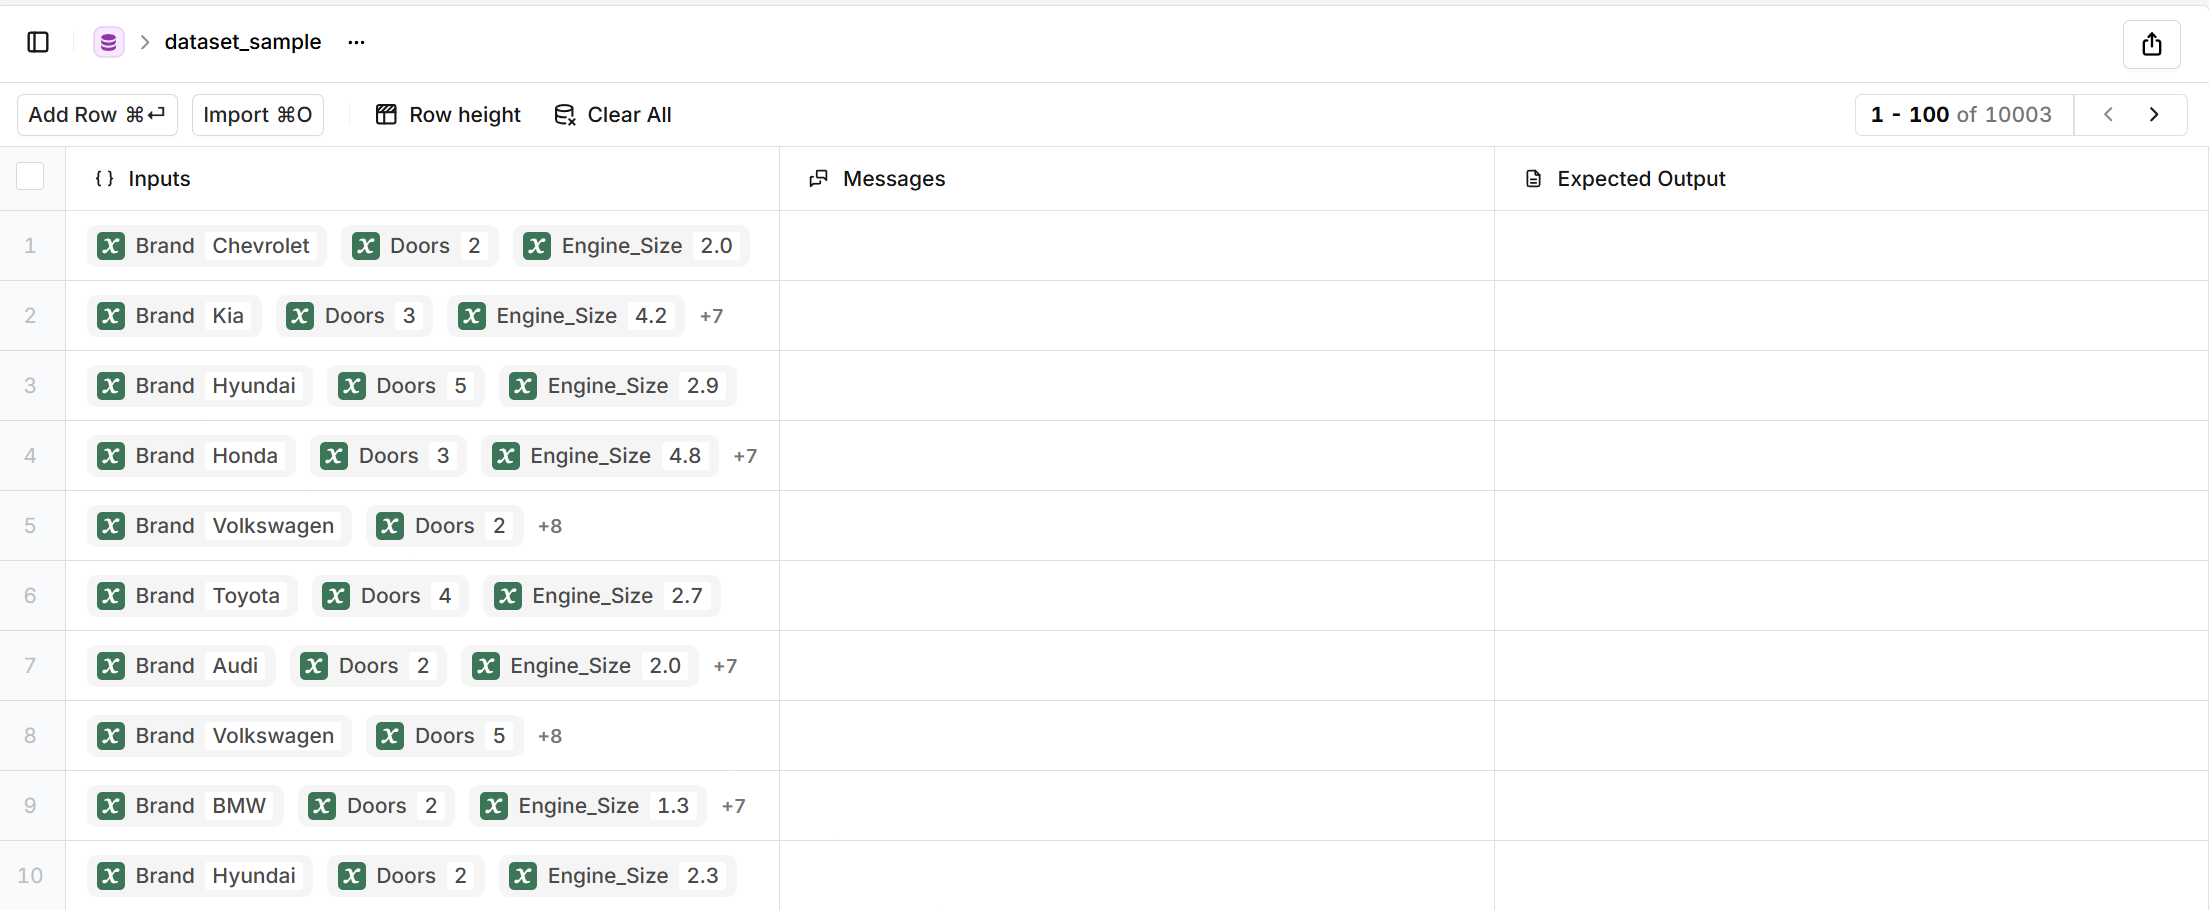

## Create_datapoint

Create a datapoint from a specific dataset

In [ ]:
#if you dont specify the new_row then it will create an empty datapoint
new_row ={}  # enter row details here

res = orq.datasets.create_datapoint(dataset_id= dataset , inputs=new_row) 

print("The details of the newly create datapoint are: ")

for i in res:
  print(i)

A sample representation of a new row created

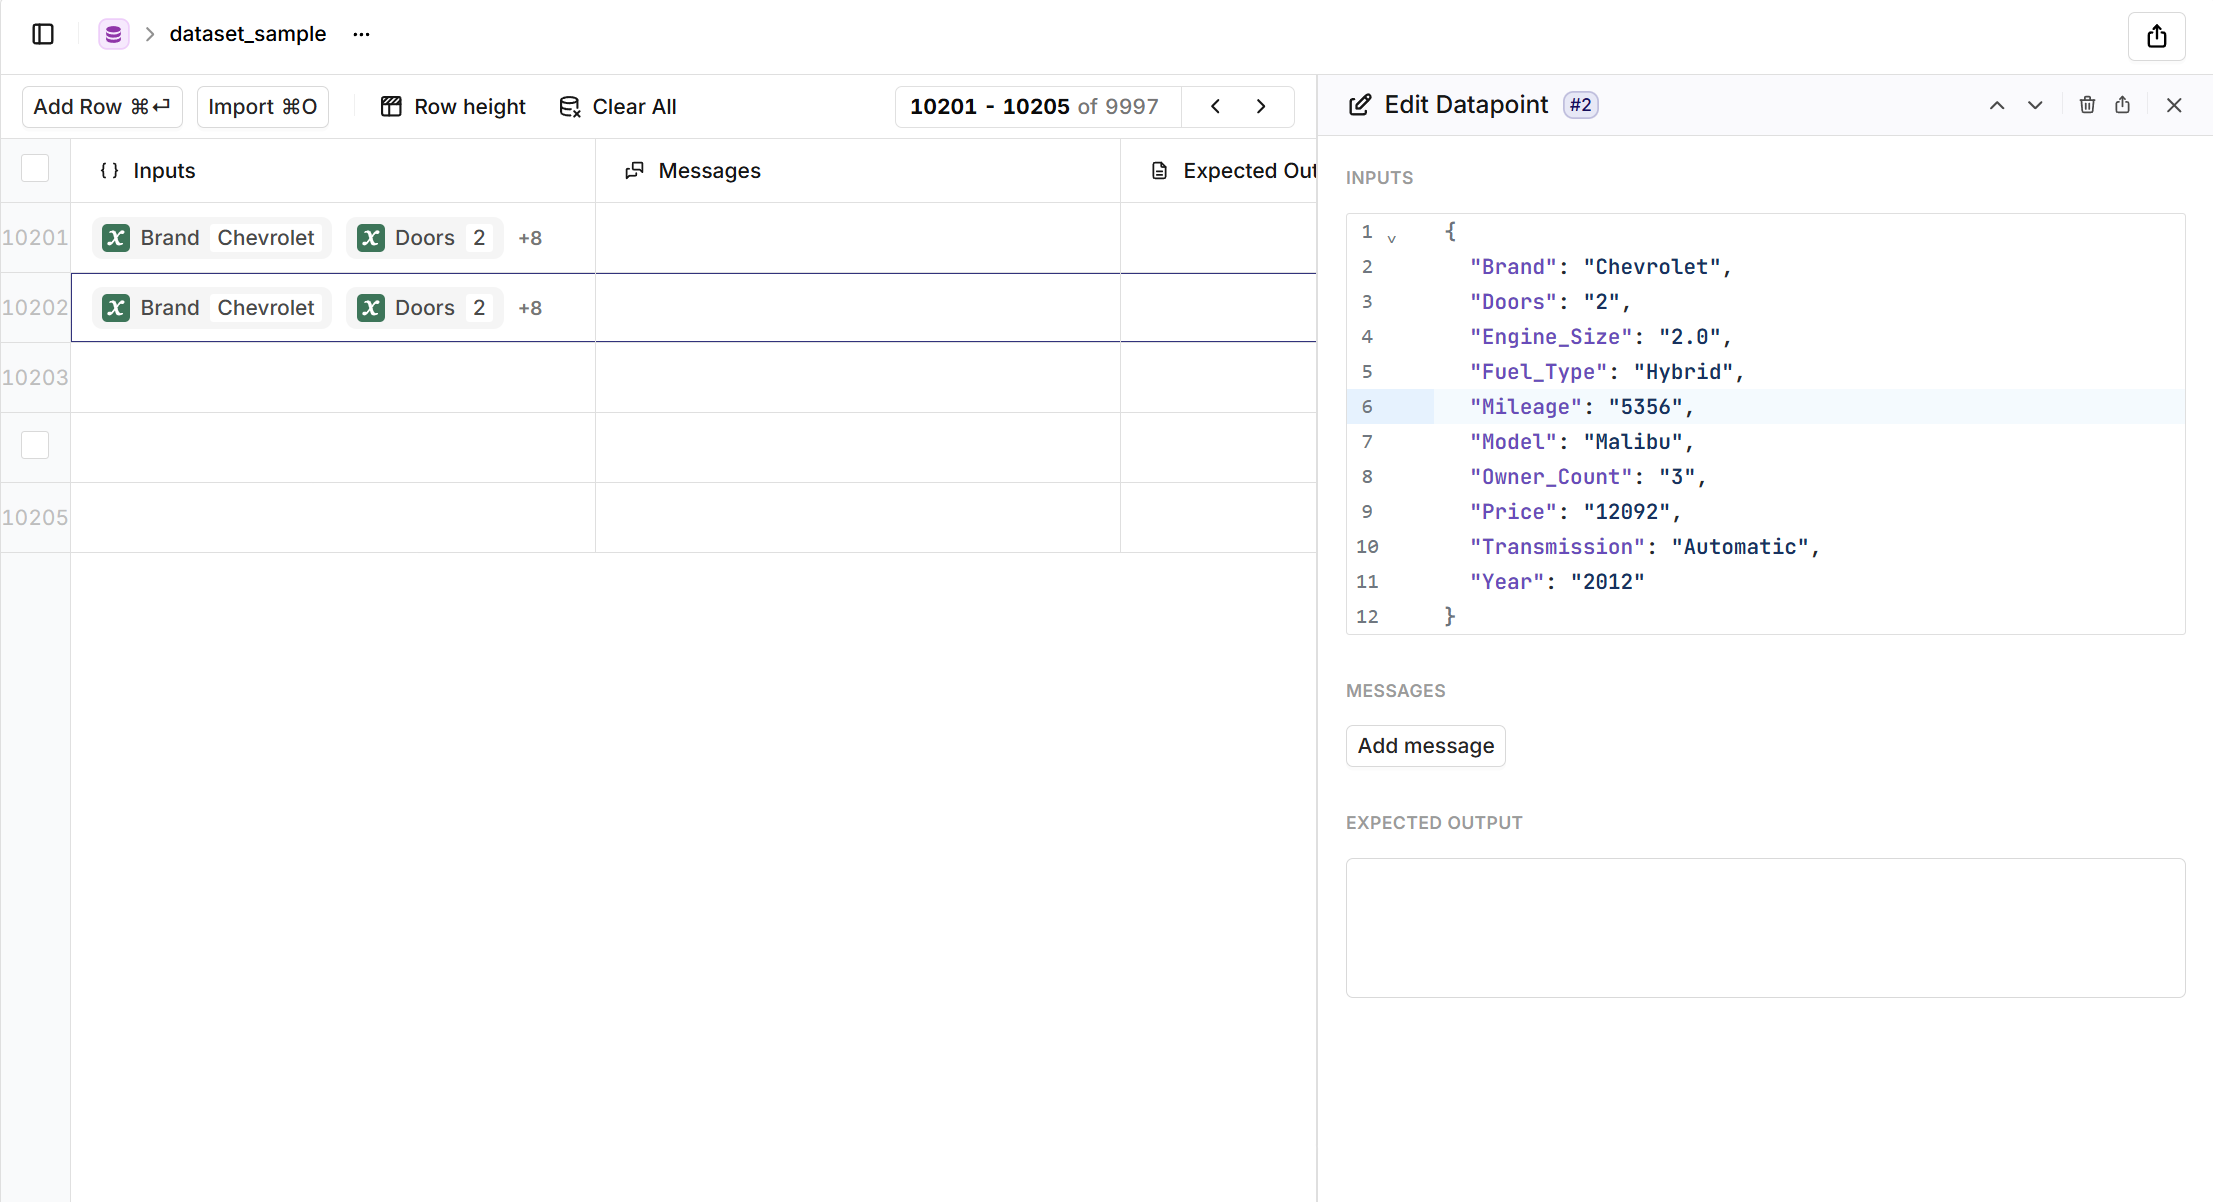

## Retrieve_datapoint

Retrieve a datapoint from a specific dataset

In [ ]:
dataset = "" # enter your dataset id
datapoint = ""  # enter your datapoint id

res = orq.datasets.retrieve_datapoint(dataset_id= dataset,datapoint_id=datapoint); 

print("The details of the retrieved datapoint are: ")
for i in res:
  print(i)

## Update_datapoint

Update a datapoint from a specific dataset

In [ ]:
dataset = "" # enter your dataset id
datapoint = "" # enter your datapoint id

res = orq.datasets.retrieve_datapoint(dataset_id= dataset,datapoint_id=datapoint); 

print("The details of the datapoint currently are: \n")
for i in res:
  print(i)

In [ ]:
updated_row ={} # add your row details here to update the datapoint

In [ ]:
res = orq.datasets.update_datapoint(dataset_id = dataset,datapoint_id=datapoint,inputs=updated_row); 

In [ ]:

res = orq.datasets.retrieve_datapoint(dataset_id = dataset,datapoint_id=datapoint); 
print("The details of the updated datapoint are: \n")
for i in res:
  print(i)


## Delete_datapoint

Delete a datapoint from a specific dataset

In [ ]:
dataset = "" # enter your dataset id
datapoint = "" # enter your datapoint id

res = orq.datasets.delete_datapoint(dataset_id= dataset,datapoint_id=datapoint); 

## Create_multiple_datapoints

Create multiple datapoints from a specific dataset

In [ ]:
print("Creating multiple datapoints at once: ")

dataset = '' # enter your dataset id

new_datapoints = [
    {
        "inputs": {}, # enter your row details here
        "messages": [],  
        "expected_output": ""
    },
    {
        "inputs": {}, # enter your row details here
        "messages": [],
        "expected_output": ""
    }
    # coninue adding datapoints
]

res = orq.datasets.create_datapoints(dataset_id=dataset, items=new_datapoints)


for i in res:
  print(i)


This is how a representation of adding multiple datapoints can look look like: 

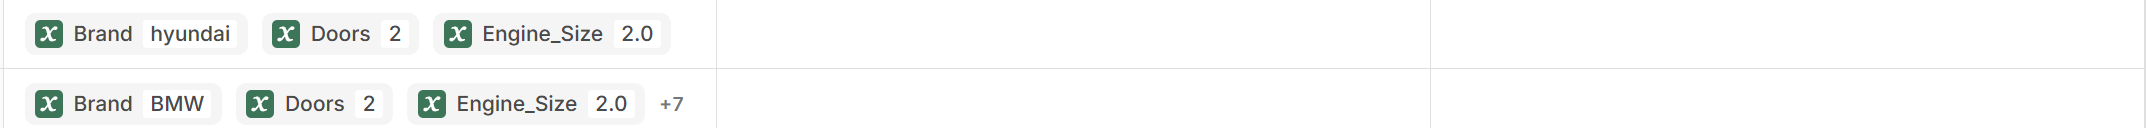

## Delete_all_datapoints

Delete all datapoints from a specific dataset

In [ ]:
res = orq.datasets.delete(dataset_id = dataset)